# 2. Создание нейронной сети без использования готовых решений

__Автор__: Никита Владимирович Блохин (NVBlokhin@fa.ru)

Финансовый университет, 2020 г. 

In [632]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F


In [633]:
torch.set_warn_always(True)

## 1. Создание нейронов и полносвязных слоев

1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [634]:
class Neuron:

    def __init__(self, weights: torch.Tensor, bias: torch.Tensor):
        self.weights = weights
        self.bias = bias

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.sum(inputs * self.weights) + self.bias

In [635]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = torch.tensor(3.14)

In [636]:
neuron = Neuron(weights, bias)
print(f'Neuron.forward: {neuron.forward(inputs)}')
print(f'functional.linear: {F.linear(inputs, weights, bias)}')

Neuron.forward: 4.840000152587891
functional.linear: 4.840000152587891


1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат. 

In [637]:
class Linear:

    def __init__(self, weights: torch.Tensor, biases: torch.Tensor):
        self.weights = weights
        self.biases = biases

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.matmul(inputs, self.weights.T) + self.biases

In [638]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])  # убрал .T

biases = torch.tensor([3.14, 2.71, 7.2])

In [639]:
m = Linear(weights, biases)
print(f'Linear.forward:\n{m.forward(inputs)}')
print(f'\nfunctional.linear:\n{F.linear(inputs, weights, biases)}')

Linear.forward:
tensor([ 4.8400,  0.1700, 10.3900])

functional.linear:
tensor([ 4.8400,  0.1700, 10.3900])


1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [640]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [641]:
m = Linear(weights, biases)
print(f'Linear.forward:\n{m.forward(inputs)}')
print(f'\nfunctional.linear:\n{F.linear(inputs, weights, biases)}')

Linear.forward:
tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

functional.linear:
tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])


1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [642]:
class Linear:

    def __init__(self, in_features: int, out_features: int):
        self.in_features = in_features
        self.out_features = out_features

        self.weights = torch.randn(out_features, in_features, requires_grad=True)
        self.biases = torch.randn(out_features, requires_grad=True)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.matmul(inputs, self.weights.T) + self.biases

In [643]:
torch.manual_seed(0)

m = Linear(4, 3)
m.forward(inputs)

tensor([[ -5.0178,   0.5240,  -3.9319],
        [  4.0738,  -6.7887,  -3.5657],
        [-11.6052,  -0.3882,  -3.1959]], grad_fn=<AddBackward0>)

In [644]:
# проверка
nn_m = nn.Linear(4, 3)
nn_m.weight = nn.Parameter(m.weights)
nn_m.bias = nn.Parameter(m.biases)
nn_m.forward(inputs)

tensor([[ -5.0178,   0.5240,  -3.9319],
        [  4.0738,  -6.7887,  -3.5657],
        [-11.6052,  -0.3882,  -3.1959]], grad_fn=<AddmmBackward0>)

1.5 Используя решение из __1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [645]:
class NeuralNet:

    def __init__(self):
        self.input = Linear(4, 10)
        self.output = Linear(10, 7)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return self.output.forward(self.input.forward(inputs))

In [646]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [647]:
torch.manual_seed(0)

m = NeuralNet()
m.forward(inputs)

tensor([[ 10.7402,   5.0857,  -1.4572, -15.8939, -12.8903,   1.4945,   8.3048],
        [ 16.8392,   7.5460,  -9.4385,  17.2115, -15.5890, -11.7024,  22.9214],
        [  4.0594,  15.9168,   6.6248,   3.1291,  -5.7448,  -8.4944,  -6.8320]],
       grad_fn=<AddBackward0>)

## 2. Создание функций активации

In [648]:
def randn(*size: int, seed: int = 0) -> torch.Tensor:
    torch.manual_seed(seed)
    return torch.randn(*size)

2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [649]:
class ReLU:

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.maximum(inputs, torch.tensor(0))

In [650]:
inputs = randn(4, 3)
inputs

tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986],
        [ 0.4033,  0.8380, -0.7193],
        [-0.4033, -0.5966,  0.1820]])

In [651]:
relu = ReLU()
nn_relu = nn.ReLU()
print(f'ReLU:\n{relu.forward(inputs)}')
print(f'\nnn.ReLU:\n{nn_relu.forward(inputs)}')

ReLU:
tensor([[1.5410, 0.0000, 0.0000],
        [0.5684, 0.0000, 0.0000],
        [0.4033, 0.8380, 0.0000],
        [0.0000, 0.0000, 0.1820]])

nn.ReLU:
tensor([[1.5410, 0.0000, 0.0000],
        [0.5684, 0.0000, 0.0000],
        [0.4033, 0.8380, 0.0000],
        [0.0000, 0.0000, 0.1820]])


2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [652]:
class Softmax:

    def __init__(self, dim: int = 0):
        assert dim == 0 or dim == 1
        self.dim = dim

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        exp = torch.exp(inputs)
        return exp / torch.sum(exp, dim=self.dim).unsqueeze(self.dim)

In [653]:
inputs = randn(4, 3)
inputs

tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986],
        [ 0.4033,  0.8380, -0.7193],
        [-0.4033, -0.5966,  0.1820]])

In [654]:
softmax = Softmax(dim=1)
nn_softmax = nn.Softmax(dim=1)
print(f'Softmax:\n{softmax.forward(inputs)}')
print(f'\nnn.Softmax:\n{nn_softmax.forward(inputs)}')

Softmax:
tensor([[0.8446, 0.1349, 0.0205],
        [0.7511, 0.1438, 0.1051],
        [0.3484, 0.5382, 0.1134],
        [0.2762, 0.2277, 0.4961]])

nn.Softmax:
tensor([[0.8446, 0.1349, 0.0205],
        [0.7511, 0.1438, 0.1051],
        [0.3484, 0.5382, 0.1134],
        [0.2762, 0.2277, 0.4961]])


2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [655]:
class ELU:

    def __init__(self, alpha: float = 1):
        self.alpha = alpha

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.where(inputs > 0, inputs, self.alpha * (torch.exp(inputs) - 1))

In [656]:
inputs = randn(4, 3)
inputs

tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986],
        [ 0.4033,  0.8380, -0.7193],
        [-0.4033, -0.5966,  0.1820]])

In [657]:
elu = ELU(alpha=1.409)
nn_elu = nn.ELU(alpha=1.409)
print(f'ELU:\n{elu.forward(inputs)}')
print(f'\nnn.ELU:\n{nn_elu.forward(inputs)}')

ELU:
tensor([[ 1.5410, -0.3583, -1.2495],
        [ 0.5684, -0.9327, -1.0611],
        [ 0.4033,  0.8380, -0.7227],
        [-0.4677, -0.6331,  0.1820]])

nn.ELU:
tensor([[ 1.5410, -0.3583, -1.2495],
        [ 0.5684, -0.9327, -1.0611],
        [ 0.4033,  0.8380, -0.7227],
        [-0.4677, -0.6331,  0.1820]])


## 3. Создание функции потерь

3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [658]:
class MSELoss:

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return torch.mean((y_true - y_pred) ** 2)

In [659]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4]).unsqueeze(1)

In [660]:
torch.manual_seed(0)

layer = Linear(4, 1)
y_pred = layer.forward(inputs)

In [661]:
mse = MSELoss()
nn_mse = nn.MSELoss()
print(f'MSELoss:\n{mse.forward(y_pred, y)}')
print(f'\nnn.MSELoss:\n{nn_mse.forward(y_pred, y)}')

MSELoss:
101.30004119873047

nn.MSELoss:
101.30004119873047


3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [662]:
class CategoricalCrossEntropyLoss:

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return torch.mean(-torch.sum(y_true * torch.log(y_pred), dim=1))

In [663]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([1, 0, 0])

In [664]:
torch.manual_seed(0)

layer = Linear(4, 3)
softmax = Softmax()
y_pred = softmax.forward(layer.forward(inputs))

In [665]:
cce = CategoricalCrossEntropyLoss()
cce.forward(y_pred, y)

tensor(8.2570, grad_fn=<MeanBackward0>)

3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [666]:
class MSELossL2:

    def __init__(self, lambda_: float, weights: torch.Tensor):
        self.lambda_ = lambda_
        self.weights = weights

    def data_loss(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return torch.sum((y_true - y_pred) ** 2)

    def reg_loss(self) -> torch.Tensor:
        return self.lambda_ * torch.sum(self.weights ** 2)

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return self.data_loss(y_pred, y_true) + self.reg_loss()

In [667]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4]).unsqueeze(1)

In [668]:
torch.manual_seed(0)

layer = Linear(4, 1)
y_pred = layer.forward(inputs)

In [669]:
mse_l2 = MSELossL2(lambda_=1.409, weights=layer.weights)
mse_l2.forward(y_pred, y)

tensor(314.5113, grad_fn=<AddBackward0>)

## 4. Обратное распространение ошибки

In [670]:
EmptyTensor = torch.Tensor | None


@dataclass
class Gradient:
    dx: EmptyTensor = None
    dw: EmptyTensor = None
    db: EmptyTensor = None


def pretty_train_log(epoch: int, **kwargs) -> None:
    params = '\n\t'.join([f'{k} = {v}' for k, v in kwargs.items()])
    print(f'epoch {epoch:03} |' + '-' * 50 + f'\n\t{params}\n')

4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [671]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=0)
# X.dtype == float64 - нет смысла использовать torch.from_numpy
# т.к. последующее приведение типов Tensor.type(torch.float32) приведет к копированию данных
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя


In [672]:
class MSELoss:
    """MSE без mean"""

    def __init__(self, grad: Gradient):
        self.grad = grad

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return (y_pred - y_true) ** 2

    def backward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> None:
        self.grad.dx = 2 * (y_pred - y_true)

4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [673]:
class Neuron:

    def __init__(self, in_features: int, grad: Gradient):
        self.in_features = in_features
        self.grad = grad

        self.weights = torch.randn(self.in_features)
        self.bias = torch.randn(1)

        self._inputs: EmptyTensor = None

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        self._inputs = inputs
        return torch.sum(inputs * self.weights) + self.bias

    def backward(self) -> None:
        dx = self.grad.dx
        self.grad.dx = dx * self.weights
        self.grad.dw = dx * self._inputs
        self.grad.db = dx

4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [674]:
torch.manual_seed(0)

y_true = y.unsqueeze(1)

grad = Gradient()
neuron = Neuron(X.size(1), grad=grad)
mse = MSELoss(grad=grad)

lr = 0.1
epochs = 100
for epoch in range(epochs + 1):
    for i, (x_, y_) in enumerate(zip(X, y_true)):
        # feed forward
        y_pred = neuron.forward(x_)
        loss = mse.forward(y_pred, y_)

        # backward
        mse.backward(y_pred, y_)
        neuron.backward()

        # optimize step
        neuron.weights -= lr * grad.dw
        neuron.bias -= lr * grad.db

        if epoch % 40 == 0 and i % 40 == 0:
            pretty_train_log(
                epoch,
                i=i,
                weights=neuron.weights,
                dw=grad.dw,
                bias=neuron.bias,
                db=grad.db,
                loss=loss,
            )

neuron.weights, coef

epoch 000 |--------------------------------------------------
	i = 0
	weights = tensor([ 5.8937,  3.4480,  8.5208, -6.0718])
	dw = tensor([ -43.5271,  -37.4140, -106.9956,   66.4020])
	bias = tensor([-9.6251])
	db = tensor([85.4055])
	loss = tensor([1823.5259])

epoch 000 |--------------------------------------------------
	i = 40
	weights = tensor([19.9110, 34.3280, 68.1895, 86.5312])
	dw = tensor([-1.9165, -0.0103, -2.5570, -0.9328])
	bias = tensor([0.1583])
	db = tensor([-2.7440])
	loss = tensor([1.8823])

epoch 000 |--------------------------------------------------
	i = 80
	weights = tensor([20.4941, 34.1600, 67.6148, 87.9335])
	dw = tensor([0.0002, 0.0010, 0.0002, 0.0004])
	bias = tensor([0.4963])
	db = tensor([-0.0036])
	loss = tensor([3.2833e-06])

epoch 040 |--------------------------------------------------
	i = 0
	weights = tensor([20.4924, 34.1698, 67.6243, 87.9235])
	dw = tensor([-2.3330e-05, -2.0053e-05, -5.7348e-05,  3.5591e-05])
	bias = tensor([0.5000])
	db = tensor([4.

(tensor([20.4924, 34.1698, 67.6242, 87.9235]),
 array([20.4923687 , 34.16981149, 67.62424823, 87.9234763 ]))

**Проверка**

Сделаем то же самое, но пусть производную посчитает pytorch (честно, будто не знаем производную сложной функции)

In [675]:
class MSELoss:

    def __init__(self):
        self._last_forward: EmptyTensor = None

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        self._last_forward = (y_pred - y_true) ** 2
        return self._last_forward

    def backward(self) -> None:
        self._last_forward.backward()


class Neuron:

    def __init__(self, in_features: int):
        self.in_features = in_features
        self.weights = torch.randn(self.in_features, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.sum(inputs * self.weights) + self.bias

    def backward(self) -> tuple[torch.Tensor, torch.Tensor]:
        dw = self.weights.grad.clone().detach()
        db = self.bias.grad.clone().detach()
        self.weights.grad.zero_()
        self.bias.grad.zero_()
        return dw, db

    def update_weights(self, lr: float, dw: torch.Tensor, db: torch.Tensor) -> None:
        with torch.no_grad():
            self.weights -= lr * dw
            self.bias -= lr * db

In [676]:
torch.manual_seed(0)

y_true = y.unsqueeze(1)

neuron = Neuron(X.size(1))
mse = MSELoss()

lr = 0.1
epochs = 100
for epoch in range(epochs + 1):
    for i, (x_example, y_example) in enumerate(zip(X, y_true)):
        # feed forward
        y_pred = neuron.forward(x_example)
        loss = mse.forward(y_pred, y_example)

        # backward
        mse.backward()
        dw, db = neuron.backward()

        # optimize step
        neuron.update_weights(lr, dw, db)

        if epoch % 40 == 0 and i % 40 == 0:
            pretty_train_log(epoch, i=i, weights=neuron.weights, dw=dw, bias=neuron.bias, db=db, loss=loss)

neuron.weights, coef

epoch 000 |--------------------------------------------------
	i = 0
	weights = tensor([ 5.8937,  3.4480,  8.5208, -6.0718], requires_grad=True)
	dw = tensor([ -43.5271,  -37.4140, -106.9956,   66.4020])
	bias = tensor([-9.6251], requires_grad=True)
	db = tensor([85.4055])
	loss = tensor([1823.5259], grad_fn=<PowBackward0>)

epoch 000 |--------------------------------------------------
	i = 40
	weights = tensor([19.9110, 34.3280, 68.1895, 86.5312], requires_grad=True)
	dw = tensor([-1.9165, -0.0103, -2.5570, -0.9328])
	bias = tensor([0.1583], requires_grad=True)
	db = tensor([-2.7440])
	loss = tensor([1.8823], grad_fn=<PowBackward0>)

epoch 000 |--------------------------------------------------
	i = 80
	weights = tensor([20.4941, 34.1600, 67.6148, 87.9335], requires_grad=True)
	dw = tensor([0.0002, 0.0010, 0.0002, 0.0004])
	bias = tensor([0.4963], requires_grad=True)
	db = tensor([-0.0036])
	loss = tensor([3.2833e-06], grad_fn=<PowBackward0>)

epoch 040 |------------------------------

(tensor([20.4924, 34.1698, 67.6242, 87.9235], requires_grad=True),
 array([20.4923687 , 34.16981149, 67.62424823, 87.9234763 ]))

4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

4.2.1 Модифицируйте класс `MSELoss` из __3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [677]:
class MSELoss:
    """MSE с большой буквы M"""

    def __init__(self, grad: Gradient):
        self.grad = grad

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return torch.mean((y_pred - y_true) ** 2)

    def backward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> None:
        self.grad.dx = 2 * (y_pred - y_true) / y_pred.size(0)

4.2.2. Модифицируйте класс `Neuron` из __4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [678]:
class Neuron:

    def __init__(self, in_features: int, grad: Gradient):
        self.in_features = in_features
        self.grad = grad

        self.weights = torch.randn(1, in_features).T
        self.bias = torch.randn(1)

        self._inputs: EmptyTensor = None

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        self._inputs = inputs
        return torch.matmul(inputs, self.weights) + self.bias

    def backward(self) -> None:
        dx = self.grad.dx
        self.grad.dx = torch.matmul(dx, self.weights.T)
        self.grad.dw = torch.matmul(self._inputs.T, dx)
        self.grad.db = torch.matmul(torch.ones(dx.size(0)), dx)

4.2.3 Допишите цикл для настройки весов нейрона

In [679]:
torch.manual_seed(0)

y_true = y.unsqueeze(1)

grad = Gradient()
neuron = Neuron(X.size(1), grad=grad)
mse = MSELoss(grad=grad)

lr = 0.1
epochs = 100
for epoch in range(epochs + 1):
    # feed forward
    y_pred = neuron.forward(X)
    loss = mse.forward(y_pred, y_true)

    # backward
    mse.backward(y_pred, y_true)
    neuron.backward()

    # optimize step
    neuron.weights -= lr * grad.dw
    neuron.bias -= lr * grad.db

    if epoch % 20 == 0:
        pretty_train_log(epoch, weights=neuron.weights, dw=grad.dw, bias=neuron.bias, db=grad.db, loss=loss)

neuron.weights, coef

epoch 000 |--------------------------------------------------
	weights = tensor([[ 8.6293],
        [ 9.3343],
        [10.9663],
        [17.8038]])
	dw = tensor([[ -70.8827],
        [ -96.2774],
        [-131.4513],
        [-172.3539]])
	bias = tensor([-1.3156])
	db = tensor([2.3111])
	loss = 14444.6875

epoch 020 |--------------------------------------------------
	weights = tensor([[21.2786],
        [35.1800],
        [65.5825],
        [86.8190]])
	dw = tensor([[ 1.0790],
        [ 1.0197],
        [-3.1022],
        [-2.3846]])
	bias = tensor([0.2985])
	db = tensor([-0.2510])
	loss = 6.3272294998168945

epoch 040 |--------------------------------------------------
	weights = tensor([[20.5444],
        [34.2572],
        [67.4866],
        [87.8947]])
	dw = tensor([[ 0.0759],
        [ 0.1231],
        [-0.1946],
        [-0.0539]])
	bias = tensor([0.4777])
	db = tensor([-0.0264])
	loss = 0.024939415976405144

epoch 060 |--------------------------------------------------
	weigh

(tensor([[20.4924],
         [34.1698],
         [67.6242],
         [87.9235]]),
 array([20.4923687 , 34.16981149, 67.62424823, 87.9234763 ]))

4.3 Используя один полносвязный слой и пакетный градиентный спуск, решите задачу регрессии из __2.4.1__

4.3.1 Модифицируйте класс `Linear` из __1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [680]:
class Linear:

    def __init__(self, in_features: int, out_features: int, grad: Gradient):
        self.in_features = in_features
        self.out_features = out_features
        self.grad = grad

        self.weights = torch.randn(out_features, in_features).T
        self.biases = torch.randn(out_features)

        self._inputs: EmptyTensor = None

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        self._inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases

    def backward(self) -> None:
        dx = self.grad.dx
        self.grad.dx = torch.matmul(dx, self.weights.T)
        self.grad.dw = torch.matmul(self._inputs.T, dx)
        self.grad.db = torch.matmul(torch.ones(dx.size(0)), dx)

4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [681]:
torch.manual_seed(0)

y_true = y.unsqueeze(1)
grad = Gradient()
layer = Linear(in_features=X.size(1), out_features=1, grad=grad)
mse = MSELoss(grad=grad)

lr = 0.1
epochs = 100
for epoch in range(epochs + 1):
    y_pred = layer.forward(X)
    loss = mse.forward(y_pred, y_true)

    mse.backward(y_pred, y_true)
    layer.backward()

    layer.weights -= lr * grad.dw
    layer.biases -= lr * grad.db

    if epoch % 20 == 0:
        pretty_train_log(epoch, weights=layer.weights, biases=layer.biases, loss=loss)

neuron.weights, coef

epoch 000 |--------------------------------------------------
	weights = tensor([[ 8.6293],
        [ 9.3343],
        [10.9663],
        [17.8038]])
	biases = tensor([-1.3156])
	loss = 14444.6875

epoch 020 |--------------------------------------------------
	weights = tensor([[21.2786],
        [35.1800],
        [65.5825],
        [86.8190]])
	biases = tensor([0.2985])
	loss = 6.3272294998168945

epoch 040 |--------------------------------------------------
	weights = tensor([[20.5444],
        [34.2572],
        [67.4866],
        [87.8947]])
	biases = tensor([0.4777])
	loss = 0.024939415976405144

epoch 060 |--------------------------------------------------
	weights = tensor([[20.4959],
        [34.1759],
        [67.6144],
        [87.9224]])
	biases = tensor([0.4979])
	loss = 0.00012233904271852225

epoch 080 |--------------------------------------------------
	weights = tensor([[20.4926],
        [34.1702],
        [67.6235],
        [87.9234]])
	biases = tensor([0.4998])
	los

(tensor([[20.4924],
         [34.1698],
         [67.6242],
         [87.9235]]),
 array([20.4923687 , 34.16981149, 67.62424823, 87.9234763 ]))

**Проверка**

А pytorch точно правильно работает?

In [682]:
torch.manual_seed(0)

weights = torch.randn(1, 4)
bias = torch.randn(1)

y_true = y.unsqueeze(1)

layer = nn.Linear(X.size(1), 1)
layer.weight = nn.Parameter(weights, requires_grad=True)
layer.bias = nn.Parameter(bias, requires_grad=True)
mse = nn.MSELoss()

lr = 0.1
optimizer = torch.optim.SGD([layer.weight, layer.bias], lr=lr)
epochs = 100

for epoch in range(epochs + 1):
    y_pred = layer.forward(X)
    loss = mse.forward(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        pretty_train_log(epoch, weight=layer.weight.data, bias=layer.bias.data, loss=loss)

    optimizer.zero_grad()

neuron.weights, coef

epoch 000 |--------------------------------------------------
	weight = tensor([[ 8.6293,  9.3343, 10.9663, 17.8038]])
	bias = tensor([-1.3156])
	loss = 14444.6875

epoch 020 |--------------------------------------------------
	weight = tensor([[21.2786, 35.1800, 65.5825, 86.8190]])
	bias = tensor([0.2985])
	loss = 6.3272294998168945

epoch 040 |--------------------------------------------------
	weight = tensor([[20.5444, 34.2572, 67.4866, 87.8947]])
	bias = tensor([0.4777])
	loss = 0.024939415976405144

epoch 060 |--------------------------------------------------
	weight = tensor([[20.4959, 34.1759, 67.6144, 87.9224]])
	bias = tensor([0.4979])
	loss = 0.00012233904271852225

epoch 080 |--------------------------------------------------
	weight = tensor([[20.4926, 34.1702, 67.6235, 87.9234]])
	bias = tensor([0.4998])
	loss = 6.166524144646246e-07

epoch 100 |--------------------------------------------------
	weight = tensor([[20.4924, 34.1698, 67.6242, 87.9235]])
	bias = tensor([0.5

(tensor([[20.4924],
         [34.1698],
         [67.6242],
         [87.9235]]),
 array([20.4923687 , 34.16981149, 67.62424823, 87.9234763 ]))

4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [683]:
torch.manual_seed(0)

X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

X.size(), y.size()

(torch.Size([100, 1]), torch.Size([100, 1]))

In [684]:
class ReLU:

    def __init__(self, grad: Gradient):
        self.grad = grad
        self._inputs: EmptyTensor = None

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        self._inputs = inputs
        return inputs.clip(min=0)

    def backward(self) -> None:
        self.grad.dx[self._inputs <= 0] = 0

In [685]:
torch.manual_seed(0)

grad = Gradient()
fc1 = Linear(X.size(1), 10, grad=grad)
relu1 = ReLU(grad=grad)
fc2 = Linear(10, 1, grad=grad)
mse = MSELoss(grad=grad)

predicts = []

lr = 0.02
epochs = 2000
for epoch in range(epochs + 1):
    # feed forward
    fc1_x = fc1.forward(X)
    relu1_x = relu1.forward(fc1_x)
    y_pred = fc2.forward(relu1_x)
    loss = mse.forward(y_pred, y)

    # backward
    mse.backward(y_pred, y)
    fc2.backward()
    dw2, db2 = grad.dw, grad.db

    relu1.backward()
    fc1.backward()
    dw1, db1 = grad.dw, grad.db

    # optimize step
    fc1.weights -= lr * dw1
    fc1.biases -= lr * db1
    fc2.weights -= lr * dw2
    fc2.biases -= lr * db2

    if epoch % 400 == 0:
        pretty_train_log(epoch, loss=loss)
        predicts.append(y_pred)

epoch 000 |--------------------------------------------------
	loss = 3.8516311645507812

epoch 400 |--------------------------------------------------
	loss = 0.005183662287890911

epoch 800 |--------------------------------------------------
	loss = 0.004125623498111963

epoch 1200 |--------------------------------------------------
	loss = 0.003962446004152298

epoch 1600 |--------------------------------------------------
	loss = 0.003925209864974022

epoch 2000 |--------------------------------------------------
	loss = 0.0039071436040103436



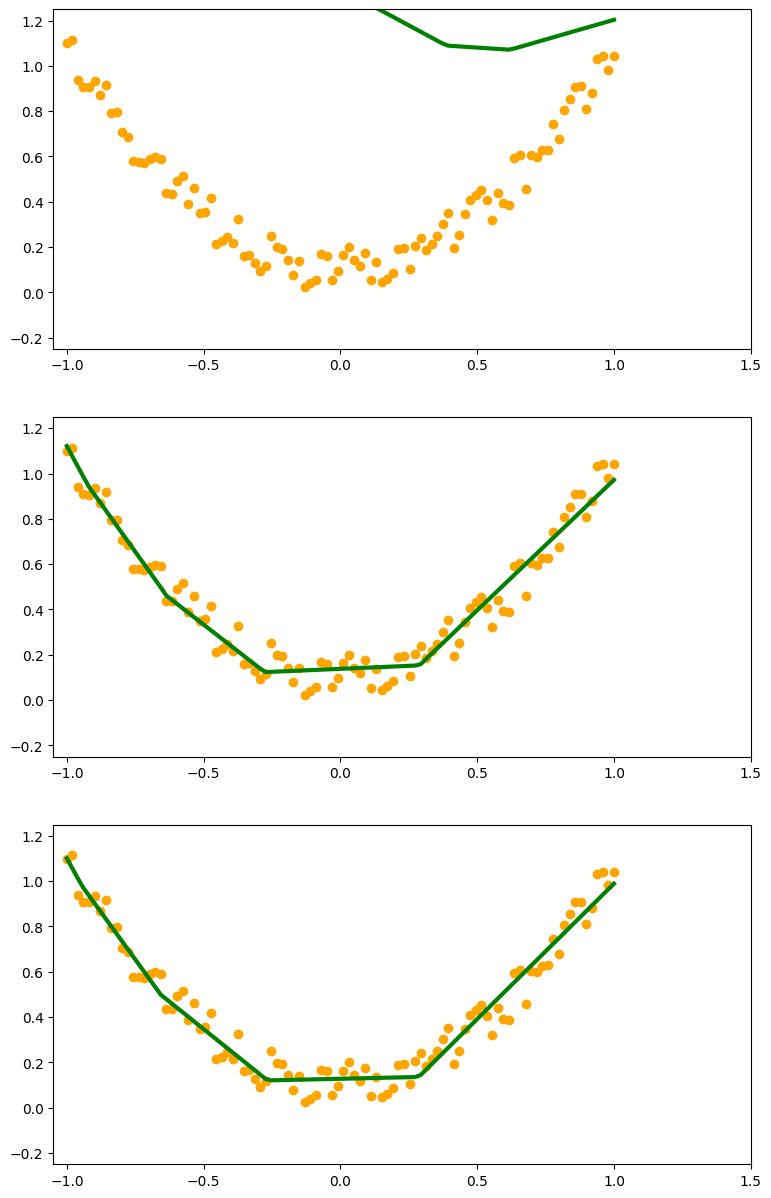

In [686]:
predicts = predicts[::2]

fig, axs = plt.subplots(len(predicts), 1, figsize=(9, 15))
for ax, y_pred in zip(axs, predicts):
    ax.scatter(X.numpy(), y.numpy(), color="orange")
    ax.plot(X.numpy(), y_pred.detach().numpy(), 'g-', lw=3)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)

**Проверка**

Сделаем то же самое средствами pytorch

In [687]:
class NeuralNet:

    def __init__(self, in_features: int, out_features: int):
        self.in_features = in_features
        self.out_features = out_features

        self.fc1 = nn.Linear(in_features, 10)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(10, out_features)

    def parameters(self) -> list[nn.Parameter]:
        return [*self.fc1.parameters(), *self.fc2.parameters()]

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return self.fc2.forward(self.relu1.forward(self.fc1.forward(inputs)))

In [688]:
torch.manual_seed(0)

model = NeuralNet(X.size(1), 1)
mse = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

predicts = []

epochs = 2000
for epoch in range(epochs + 1):
    y_pred = model.forward(X)
    loss = mse.forward(y_pred, y)

    loss.backward()
    optimizer.step()

    if epoch % 400 == 0:
        pretty_train_log(epoch, loss=loss)
        predicts.append(y_pred)

    optimizer.zero_grad()

epoch 000 |--------------------------------------------------
	loss = 0.47132760286331177

epoch 400 |--------------------------------------------------
	loss = 0.042419206351041794

epoch 800 |--------------------------------------------------
	loss = 0.012609979137778282

epoch 1200 |--------------------------------------------------
	loss = 0.006811199709773064

epoch 1600 |--------------------------------------------------
	loss = 0.005534584634006023

epoch 2000 |--------------------------------------------------
	loss = 0.00490344874560833



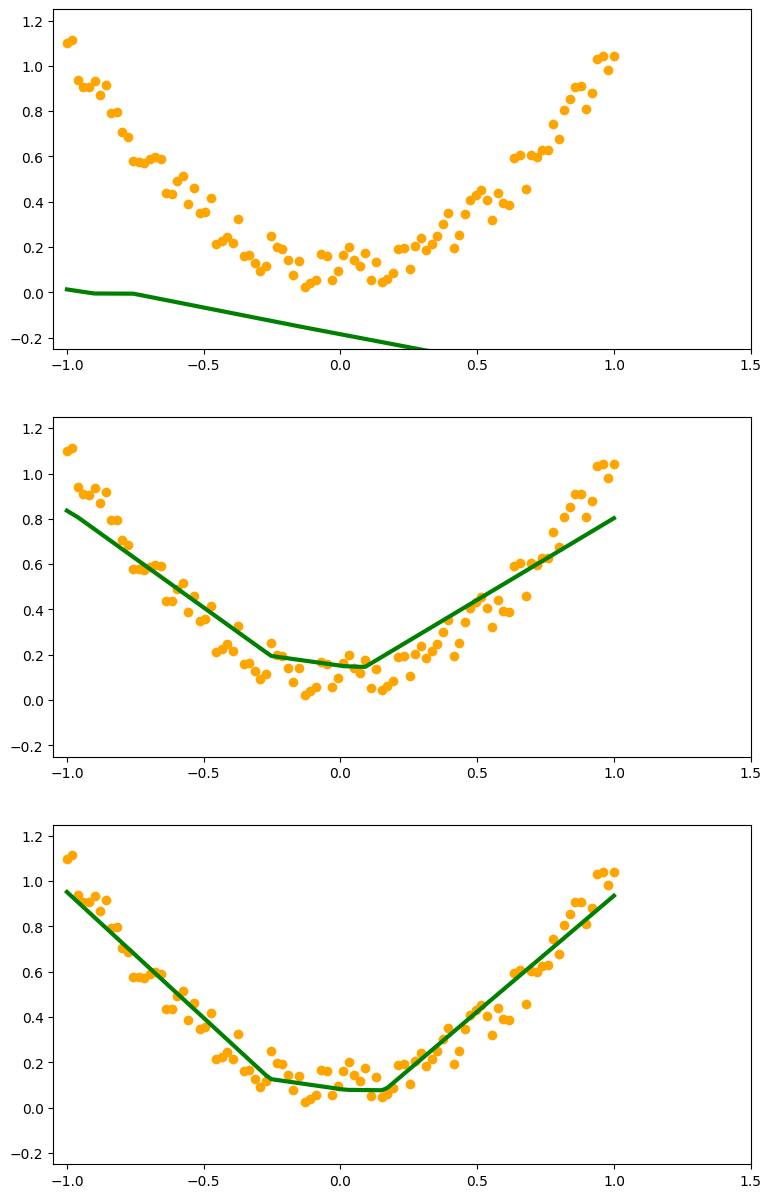

In [689]:
predicts = predicts[::2]

fig, axs = plt.subplots(len(predicts), 1, figsize=(9, 15))
for ax, y_pred in zip(axs, predicts):
    ax.scatter(X.numpy(), y.numpy(), color="orange")
    ax.plot(X.numpy(), y_pred.detach().numpy(), 'g-', lw=3)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)